In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
data = pd.ExcelFile("ComplainsData.xlsx") #importation du fichier excel
XXX = data.parse()
XXX.head()


,ID,ComplainDate,CompletionDate,CustomerID,BrokerID,ProductID,ComplainPriorityID,ComplainTypeID,ComplainSourceID,ComplainCategoryID,ComplainStatusID,AdministratorID,ClientSatisfaction,ExpectedReimbursement,Handled_By
0,7,2011-12-20,2012-01-13,620216,7640,73,1,5,5,18,9,98.0,SAT,0.0,1018
1,8,2011-12-20,2011-12-23,672165,10967,62,1,7,3,18,9,98.0,SAT,0.0,1015
2,16,2011-12-27,2012-01-26,11606,11127,41,1,3,5,13,9,98.0,NSA,0.0,1007
3,17,2011-12-27,2012-01-27,872360,10637,4,1,5,5,11,9,98.0,NaN,0.0,1003
4,18,2011-12-27,2012-01-18,2004046,12116,12,1,3,5,10,9,98.0,NaN,0.0,1017


In [3]:
df =  XXX[['Handled_By','ComplainStatusID','ComplainTypeID','ProductID','BrokerID','CustomerID']]
dataset = df.replace(np.nan,0)
dataset


,Handled_By,ComplainStatusID,ComplainTypeID,ProductID,BrokerID,CustomerID
0,1018,9,5,73,7640,620216
1,1015,9,7,62,10967,672165
2,1007,9,3,41,11127,11606
3,1003,9,5,4,10637,872360
4,1017,9,3,12,12116,2004046
...,...,...,...,...,...,...
13841,1010,9,5,31,9800,511388
13842,1011,4,9,74,10071,236624
13843,1004,4,5,76,11171,1770918
13844,1009,1,5,71,11182,289515


In [4]:
#Les noms des colonnes
print(df.columns)

Index(['Handled_By', 'ComplainStatusID', 'ComplainTypeID', 'ProductID',
       'BrokerID', 'CustomerID'],
      dtype='object')


In [5]:
#Type de chaque colonne
print(df.dtypes)

Handled_By          int64
ComplainStatusID    int64
ComplainTypeID      int64
ProductID           int64
BrokerID            int64
CustomerID          int64
dtype: object


In [6]:
df.describe()

,Handled_By,ComplainStatusID,ComplainTypeID,ProductID,BrokerID,CustomerID
count,13846.000000,13846.000000,13846.000000,13846.000000,13846.000000,1.384600e+04
mean,1009.470100,8.977394,4.945038,39.248592,7773.277698,1.259591e+06
std,5.867547,0.381016,5.823944,22.659281,4354.651161,7.917762e+05
min,1000.000000,1.000000,1.000000,1.000000,2.000000,1.800000e+01
25%,1004.000000,9.000000,3.000000,20.000000,2316.000000,5.003772e+05
50%,1009.000000,9.000000,5.000000,39.000000,9873.000000,1.675430e+06
75%,1015.000000,9.000000,5.000000,58.000000,11119.000000,1.911410e+06
max,1019.000000,9.000000,99.000000,78.000000,12769.000000,2.581366e+06


array([[<AxesSubplot:xlabel='Handled_By', ylabel='Handled_By'>,
        <AxesSubplot:xlabel='ComplainStatusID', ylabel='Handled_By'>,
        <AxesSubplot:xlabel='ComplainTypeID', ylabel='Handled_By'>,
        <AxesSubplot:xlabel='ProductID', ylabel='Handled_By'>,
        <AxesSubplot:xlabel='BrokerID', ylabel='Handled_By'>,
        <AxesSubplot:xlabel='CustomerID', ylabel='Handled_By'>],
       [<AxesSubplot:xlabel='Handled_By', ylabel='ComplainStatusID'>,
        <AxesSubplot:xlabel='ComplainStatusID', ylabel='ComplainStatusID'>,
        <AxesSubplot:xlabel='ComplainTypeID', ylabel='ComplainStatusID'>,
        <AxesSubplot:xlabel='ProductID', ylabel='ComplainStatusID'>,
        <AxesSubplot:xlabel='BrokerID', ylabel='ComplainStatusID'>,
        <AxesSubplot:xlabel='CustomerID', ylabel='ComplainStatusID'>],
       [<AxesSubplot:xlabel='Handled_By', ylabel='ComplainTypeID'>,
        <AxesSubplot:xlabel='ComplainStatusID', ylabel='ComplainTypeID'>,
        <AxesSubplot:xlabel='ComplainT

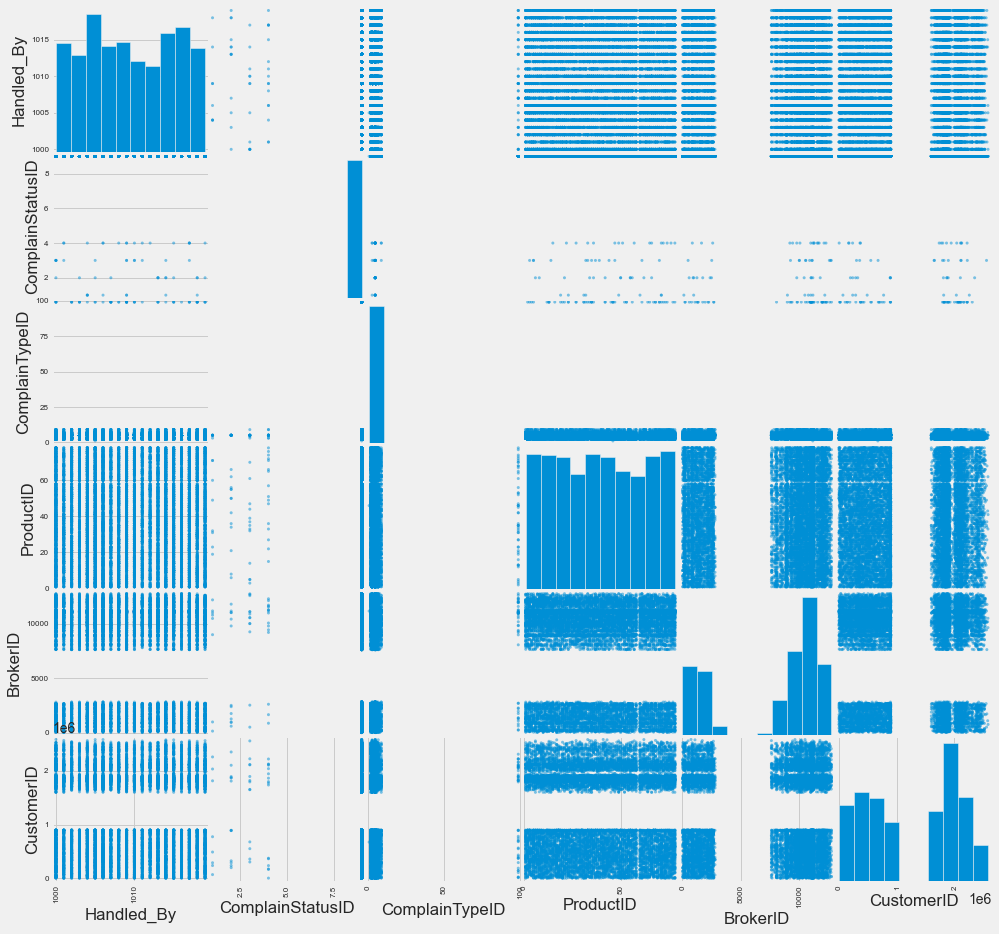

In [8]:
#graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(15,15))

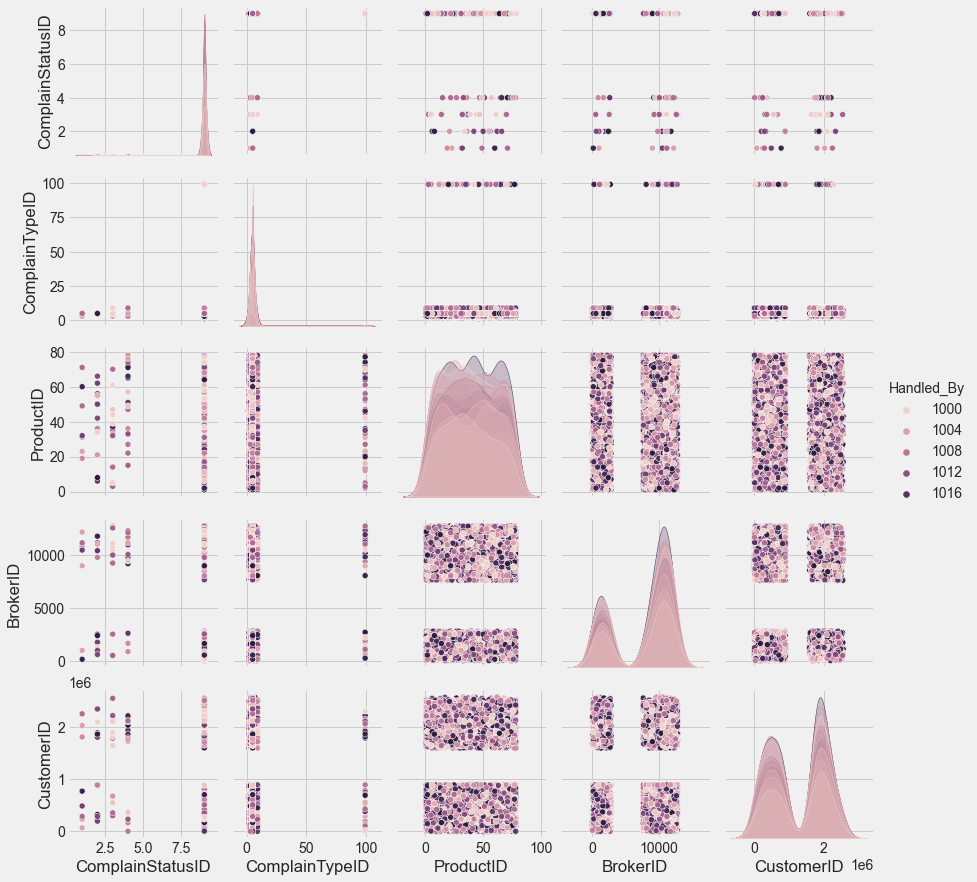

In [9]:
import seaborn as sns
sns.pairplot(df, hue="Handled_By")

**Méthode des centres mobiles : Kmeans avec le package « scikit-learn»** 

In [10]:
df.head()


,Handled_By,ComplainStatusID,ComplainTypeID,ProductID,BrokerID,CustomerID
0,1018,9,5,73,7640,620216
1,1015,9,7,62,10967,672165
2,1007,9,3,41,11127,11606
3,1003,9,5,4,10637,872360
4,1017,9,3,12,12116,2004046


In [12]:
# valeurs de toutes les colonnes
#colonnes => 0:5 (0 à 5 [non inclus])
#lignes = : (toutes les colonnes)
V_SansLabels=df.iloc[:,1:6];
#Labels
V_Labels=df.iloc[:,1];

In [14]:
#k-means 
import numpy as np
from sklearn import cluster 
kmeans = cluster.KMeans(n_clusters=2);
kmeans.fit(V_SansLabels);
#index triés des groupes 
idk = np.argsort(kmeans.labels_);
#affichage des observations et leurs groupes 
print(pd.DataFrame(V_SansLabels.index[idk],kmeans.labels_[idk]));
kmeans.labels_
#distances aux centres de classes des observations 
print(kmeans.transform(V_SansLabels));
#correspondance avec les groupes réels 
pd.crosstab(V_Labels,kmeans.labels_)

        0
0       0
0    5641
0    5640
0   10940
0    5636
..    ...
1    6102
1    6103
1    6104
1    6072
1   13845

[13846 rows x 1 columns]
[[ 138230.60667803 1367815.36956436]
 [ 190207.36334877 1315870.1037613 ]
 [ 470391.78412487 1976428.11189789]
 ...
 [1288937.21188641  217139.11502109]
 [ 192501.6220317  1698519.67081275]
 [1643281.51713546  137297.19479479]]


col_0,0,1
ComplainStatusID,,
1,5,3
2,7,6
3,4,9
4,6,10
9,6675,7121


K-MEANS, à la différence de la CAH, ne fournit pas d’outils d’aide à la détection du nombre de classes. Nous devons les programmer sous Python ou utiliser des procédures proposées par des packages dédiés. Le schéma est souvent le même : on fait varier le nombre de groupes et on surveille l’évolution d’un indicateur de qualité de la solution c.-à-d. l’aptitude des individus à être plus proches de ses congénères du même groupe que des individus des autres groupes. Dans ce qui suit, on calcule la métrique «silhouette » pour différents nombres de groupes issus de la méthode des centres mobiles.

[0.81159516 0.71371005 0.64119351 0.62794245 0.64120555 0.63859613
 0.60746592 0.59973373 0.58176937]


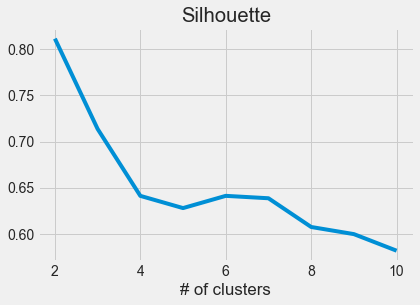

In [15]:
#librairie pour évaluation des partitions 
from sklearn import metrics

#utilisation de la métrique "silhouette" 
#faire varier le nombre de clusters de 2 à 10 
res = np.arange(9,dtype="double") 
for k in np.arange(9): 
  km = cluster.KMeans(n_clusters=k+2) 
  km.fit(V_SansLabels) 
  res[k] = metrics.silhouette_score(V_SansLabels,km.labels_)
print(res)
#graphique 
import matplotlib.pyplot as plt 
plt.title("Silhouette") 
plt.xlabel("# of clusters") 
plt.plot(np.arange(2,11,1),res) 
plt.show()

Classification Hiérarchique Ascendante (CAH)

In [16]:
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [19]:
#générer la matrice des distances 
Z = linkage(V_SansLabels,method='ward',metric='euclidean')

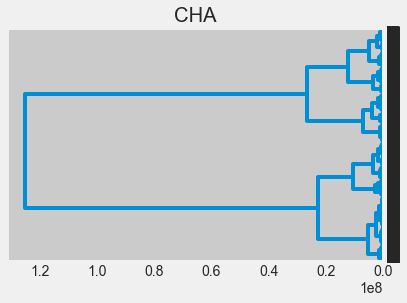

In [20]:
#affichage du dendrogramme 
plt.title("CHA") 
dendrogram(Z,labels=V_SansLabels.index,orientation='left',color_threshold=0) 
plt.show()

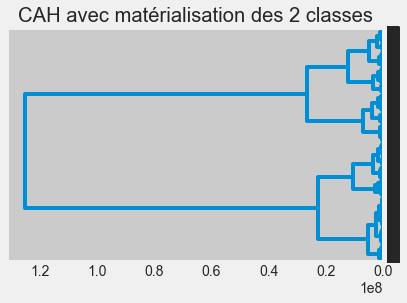

[293 306 344 ...  18 427 191]
         0
1     9254
1     9300
1     5970
1    12848
1     7155
..     ...
505   5413
505    499
505  13805
505  11487
505   6716

[13846 rows x 1 columns]


In [22]:
# matérialisation des deux classes (hauteur t = 17500) 
plt.title('CAH avec matérialisation des 2 classes') 
dendrogram(Z,labels=V_SansLabels.index,orientation='left',color_threshold=17500) 
plt.show()

#découpage à la hauteur t = 17500==> identifiants de 2 groupes obtenus 
groupes_cah = fcluster(Z,t=17500,criterion='distance') 
print(groupes_cah)

#index triés des groupes 
import numpy as np 
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pd.DataFrame(V_SansLabels.index[idg],groupes_cah[idg]))

In [24]:
#correspondance les vrais labels avec les groupes de la CAH 
pd.crosstab(V_Labels,groupes_cah)

col_0,1,2,3,4,5,6,7,8,9,10,...,496,497,498,499,500,501,502,503,504,505
ComplainStatusID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,14,17,35,30,35,17,33,38,43,...,12,18,32,16,21,15,27,31,24,30
